# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
!pip install citipy

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

     -------------------------------------- 675.6/675.6 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675970 sha256=f153243f7ef98c247bba84b5d0f48881a004ed83abfcbf2c9686f3fa30ba8135
  Stored in directory: c:\users\samso\appdata\local\pip\cache\wheels\ca\bd\d1\2bee2b54030fe2e29a1a6a7b10e6781aff17bdff423fc401d6
Successfully built citipy


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | whitehorse
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | afaahiti
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | jieshi
Processing Record 7 of Set 1 | el nido
Processing Record 8 of Set 1 | raja
Processing Record 9 of Set 1 | camana
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | marsaskala
City not found. Skipping...
Processing Record 12 of Set 1 | toamasina
Processing Record 13 of Set 1 | utrik
Processing Record 14 of Set 1 | grand island
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | nizhneangarsk
Processing Record 17 of Set 1 | fisterra
Processing Record 18 of Set 1 | zaozersk
Processing Record 19 of Set 1 | geraldton
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | strezhevoy
Processing Record 22 of Set 

Processing Record 38 of Set 4 | puerto armuelles
Processing Record 39 of Set 4 | mishelevka
Processing Record 40 of Set 4 | vadso
Processing Record 41 of Set 4 | porto empedocle
Processing Record 42 of Set 4 | puerto baquerizo moreno
Processing Record 43 of Set 4 | kitimat
Processing Record 44 of Set 4 | havre
Processing Record 45 of Set 4 | amahai
Processing Record 46 of Set 4 | jamestown
Processing Record 47 of Set 4 | acapulco de juarez
Processing Record 48 of Set 4 | port alfred
Processing Record 49 of Set 4 | freetown
Processing Record 0 of Set 5 | kulunda
Processing Record 1 of Set 5 | stanley
Processing Record 2 of Set 5 | ermoupolis
Processing Record 3 of Set 5 | namdrik
Processing Record 4 of Set 5 | coaticook
Processing Record 5 of Set 5 | mar del plata
Processing Record 6 of Set 5 | agat village
Processing Record 7 of Set 5 | funafuti
Processing Record 8 of Set 5 | rasulnagar
Processing Record 9 of Set 5 | saint-francois
Processing Record 10 of Set 5 | lihue
Processing Recor

Processing Record 26 of Set 8 | chazuta
Processing Record 27 of Set 8 | melfi
Processing Record 28 of Set 8 | kapuskasing
Processing Record 29 of Set 8 | trenton
Processing Record 30 of Set 8 | al kharijah
Processing Record 31 of Set 8 | island harbour
Processing Record 32 of Set 8 | mweka
Processing Record 33 of Set 8 | jijiga
Processing Record 34 of Set 8 | rajgarh
Processing Record 35 of Set 8 | cabo san lucas
Processing Record 36 of Set 8 | gisborne
Processing Record 37 of Set 8 | marka
Processing Record 38 of Set 8 | emerald
Processing Record 39 of Set 8 | wiwili
Processing Record 40 of Set 8 | porto novo
Processing Record 41 of Set 8 | detroit lakes
Processing Record 42 of Set 8 | pecos
Processing Record 43 of Set 8 | papao
Processing Record 44 of Set 8 | lagoa
Processing Record 45 of Set 8 | itai
Processing Record 46 of Set 8 | gereida
Processing Record 47 of Set 8 | mana
Processing Record 48 of Set 8 | celestun
Processing Record 49 of Set 8 | vrede
Processing Record 0 of Set 9 

Processing Record 21 of Set 12 | coron
Processing Record 22 of Set 12 | keflavik
Processing Record 23 of Set 12 | krotovka
Processing Record 24 of Set 12 | la ronge
Processing Record 25 of Set 12 | bonthe
Processing Record 26 of Set 12 | vidalia
Processing Record 27 of Set 12 | shahrud
Processing Record 28 of Set 12 | sakakah
Processing Record 29 of Set 12 | omaruru
Processing Record 30 of Set 12 | dalandzadgad
Processing Record 31 of Set 12 | bamboo flat
Processing Record 32 of Set 12 | tomatlan
Processing Record 33 of Set 12 | guayaramerin
Processing Record 34 of Set 12 | balurghat
Processing Record 35 of Set 12 | ulaangom
Processing Record 36 of Set 12 | fada
Processing Record 37 of Set 12 | kurtamysh
Processing Record 38 of Set 12 | sabang
Processing Record 39 of Set 12 | bayanhongor
Processing Record 40 of Set 12 | bubaque
Processing Record 41 of Set 12 | mantua
Processing Record 42 of Set 12 | taro
Processing Record 43 of Set 12 | guiglo
Processing Record 44 of Set 12 | kitami
Pr

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,-5.15,75,56,3.58,GS,1692058580
1,whitehorse,60.7161,-135.0538,16.12,45,75,8.23,CA,1692058580
2,port-aux-francais,-49.3500,70.2167,5.14,93,100,10.64,TF,1692058581
3,afaahiti,-17.7500,-149.2833,26.93,79,67,5.18,PF,1692058581
4,margaret river,-33.9500,115.0667,14.14,74,14,5.98,AU,1692058581


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-5.15,75,56,3.58,GS,1692058580
1,whitehorse,60.7161,-135.0538,16.12,45,75,8.23,CA,1692058580
2,port-aux-francais,-49.3500,70.2167,5.14,93,100,10.64,TF,1692058581
3,afaahiti,-17.7500,-149.2833,26.93,79,67,5.18,PF,1692058581
4,margaret river,-33.9500,115.0667,14.14,74,14,5.98,AU,1692058581


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

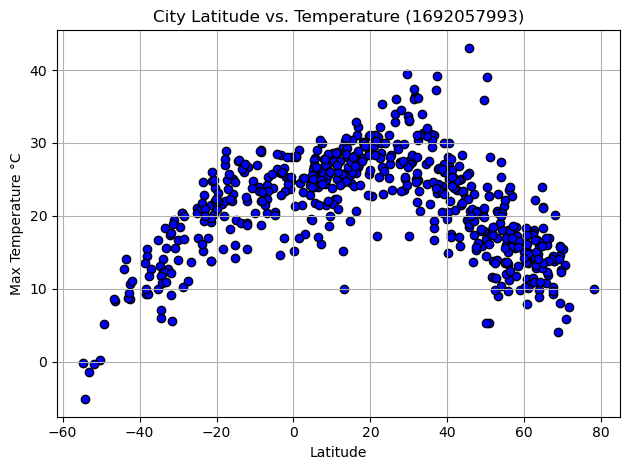

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')


# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

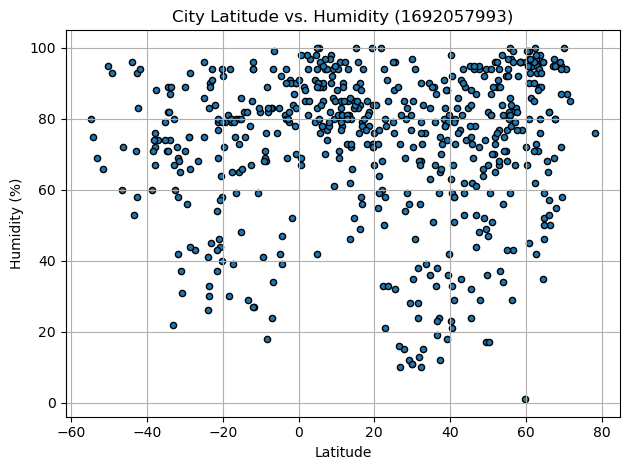

In [14]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Humidity ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

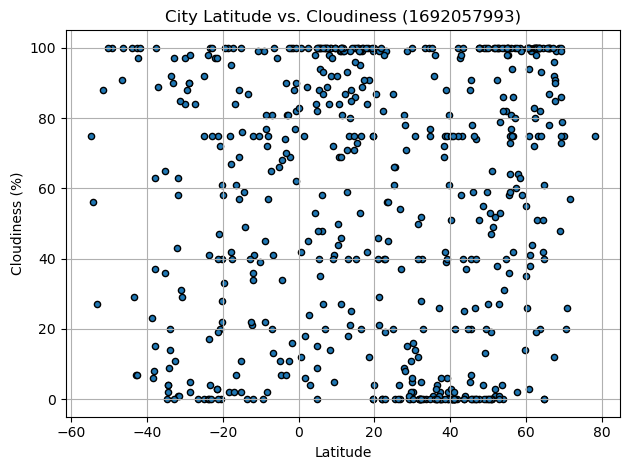

In [15]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Cloudiness ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

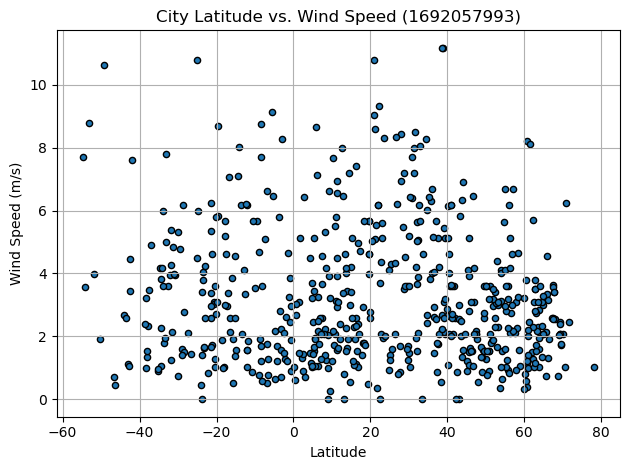

In [16]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Wind Speed ({date})')


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,whitehorse,60.7161,-135.0538,16.12,45,75,8.23,CA,1692058580
5,jieshi,22.8134,115.8257,28.58,80,19,4.36,CN,1692058581
6,el nido,11.1858,119.3956,27.73,81,100,3.14,PH,1692058581
7,raja,8.4596,25.6780,21.52,98,92,1.25,SS,1692058582
11,utrik,11.2278,169.8474,28.66,80,27,6.95,MH,1692058583


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-5.15,75,56,3.58,GS,1692058580
2,port-aux-francais,-49.3500,70.2167,5.14,93,100,10.64,TF,1692058581
3,afaahiti,-17.7500,-149.2833,26.93,79,67,5.18,PF,1692058581
4,margaret river,-33.9500,115.0667,14.14,74,14,5.98,AU,1692058581
8,camana,-16.6228,-72.7111,18.19,80,7,2.57,PE,1692058582


###  Temperature vs. Latitude Linear Regression Plot

Linear equation: y = -0.21x + 30.02
The r-value is: -0.62695913385662


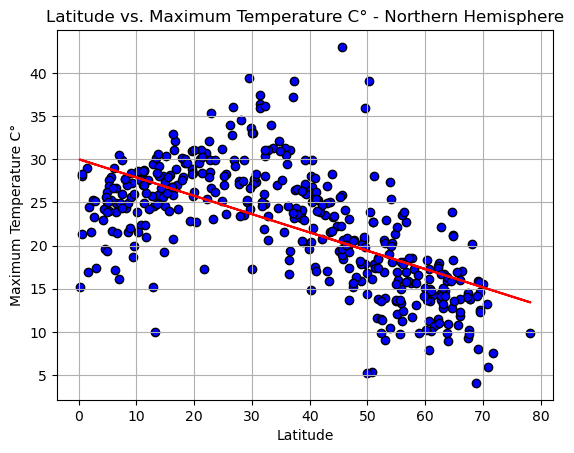

In [20]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature in Northern Hemisphere")

# Define a function to create Linear Regression plots
def lr_funcV2(x,y,name,vbl,hemi):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    print(f'Linear equation: {line_eq}')
    plt.savefig(f"../output_data/LinearRegresion_{name}.png")
    print(f'The r-value is: {rvalue}')

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.42x + 27.89
The r-value is: 0.8295286393857645


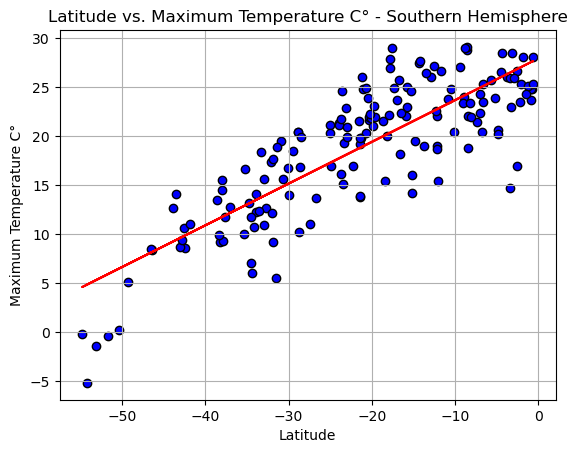

In [21]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
name = 'SH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

Linear equation: y = -0.05x + 75.66
The r-value is: -0.046004418656549924


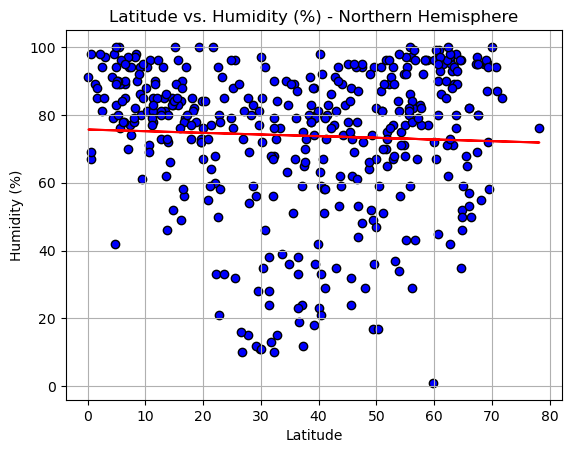

In [22]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
name = 'NH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.02x + 70.88
The r-value is: 0.013339976453318619


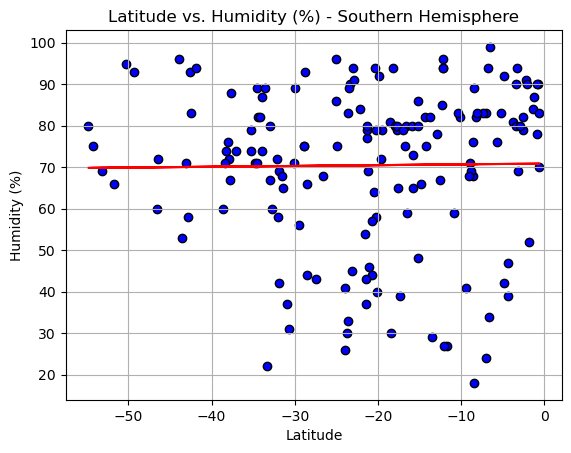

In [23]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
name = 'SH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Linear equation: y = 0.01x + 55.72
The r-value is: 0.004075607115609215


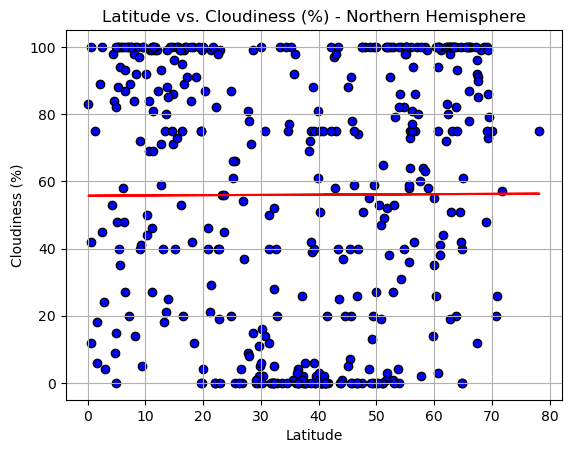

In [24]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
name = 'NH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.13x + 55.03
The r-value is: 0.04813825845747731


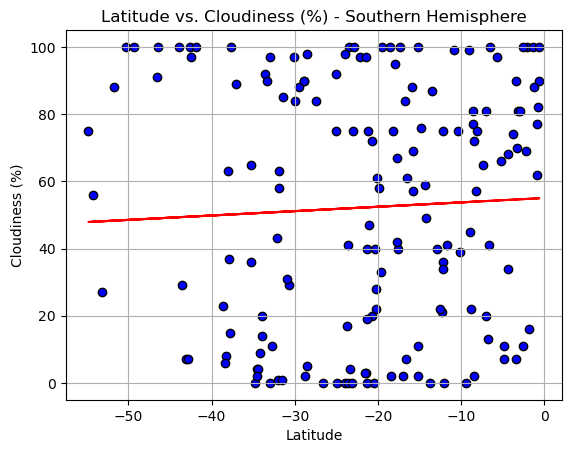

In [25]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
name = 'SH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Linear equation: y = -0.01x + 3.61
The r-value is: -0.12702833794849444


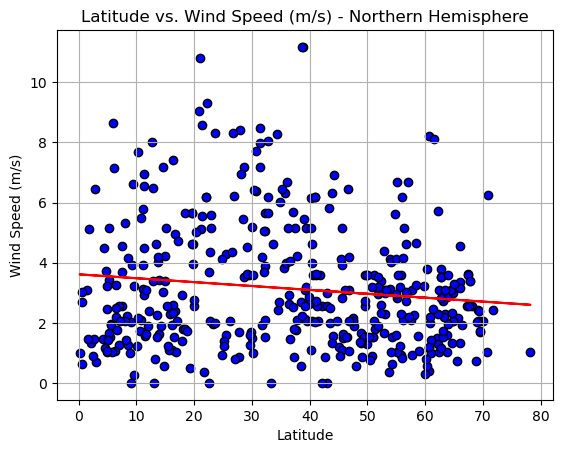

In [26]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
name = 'NH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = -0.01x + 3.03
The r-value is: -0.08507846382929168


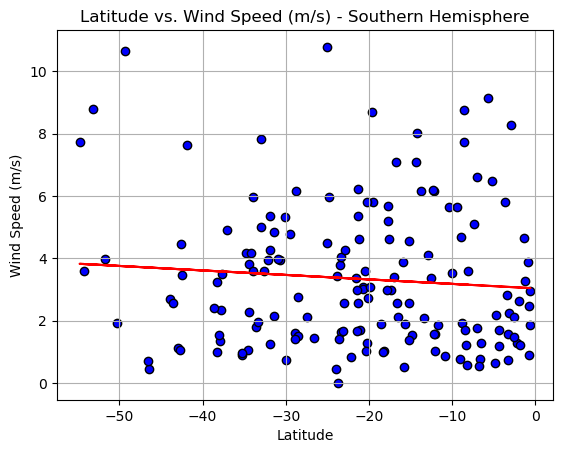

In [27]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
name = 'SH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE